In [238]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read in file
df = pd.read_csv('housing2.csv')

# Get the row and column number
ROW = df.shape[0]
COL = df.shape[1]
print("Number of Rows of Data = " + str(ROW))
print("Number of Columns of Data = " + str(COL) + '\n')

df.head()
df.tail()

# Remove missing values
df=df.dropna()

print("Data types in 'df': ")
print(df.dtypes, "\n")

print("Missing data in 'df': ")
print(df.isnull().sum(), "\n")

# Displays the number of times each specific value of 'MEDV' in 'df'
df['MEDV'].value_counts()


Number of Rows of Data = 506
Number of Columns of Data = 27

Data types in 'df': 
ATT1       float64
ATT2       float64
ATT3       float64
ATT4       float64
ATT5       float64
ATT6       float64
ATT7       float64
ATT8       float64
ATT9       float64
ATT10      float64
ATT11      float64
ATT12      float64
ATT13      float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object 

Missing data in 'df': 
ATT1       0
ATT2       0
ATT3       0
ATT4       0
ATT5       0
ATT6       0
ATT7       0
ATT8       0
ATT9       0
ATT10      0
ATT11      0
ATT12      0
ATT13      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64 



50.0    16
25.0     8
22.0     7
21.7     7
20.6     6
23.1     6
19.4     6
22.2     5
23.9     5
20.0     5
21.2     5
22.6     5
19.6     5
15.6     5
19.3     5
17.8     5
20.3     4
23.2     4
23.8     4
23.0     4
24.4     4
21.4     4
18.5     4
20.1     4
20.4     4
23.7     4
24.8     4
22.8     4
23.3     4
18.9     4
        ..
31.7     1
43.1     1
41.3     1
16.7     1
11.0     1
22.1     1
9.5      1
13.0     1
7.0      1
8.1      1
26.2     1
12.8     1
42.3     1
35.1     1
32.4     1
33.3     1
28.2     1
31.2     1
37.2     1
28.6     1
15.1     1
17.3     1
6.3      1
39.8     1
29.9     1
12.6     1
17.7     1
36.1     1
31.1     1
44.8     1
Name: MEDV, Length: 210, dtype: int64

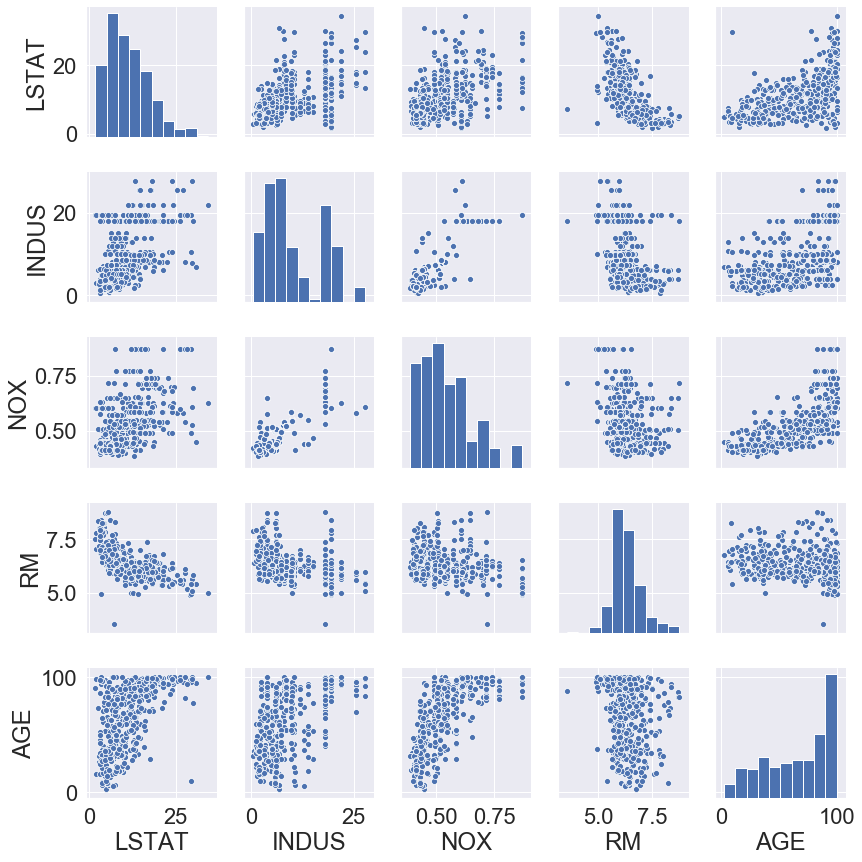

In [235]:
# Show graphical summary of the relationships in 'df'
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

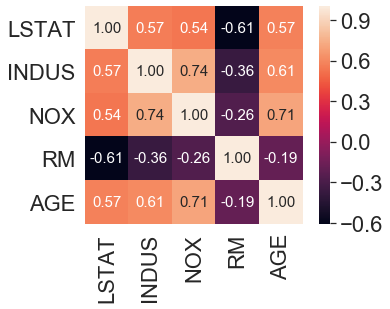

In [234]:
# Respective linear correlations table
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols, xticklabels=cols)           
plt.show()

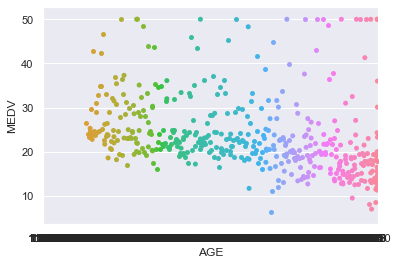

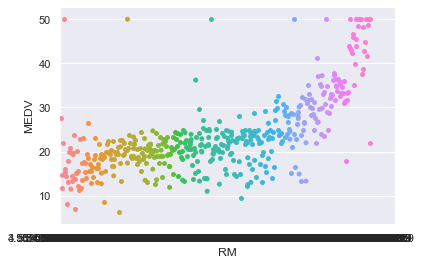

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.swarmplot(x='AGE', y='MEDV', data=df)
# Label the axes
_ = plt.xlabel('AGE')
_ = plt.ylabel('MEDV')
# Show the plot
plt.show()

_ = sns.swarmplot(x='RM', y='MEDV', data=df)
# Label the axes
_ = plt.xlabel('RM')
_ = plt.ylabel('MEDV')
# Show the plot
plt.show()

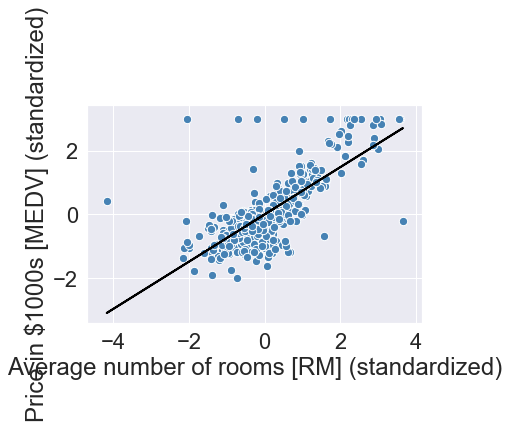

Slope: 0.740
Intercept: 0.000


In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# From Chapter 2, Training Simple Machine Learning Algorithms for Classification 
class LinearRegressionGD(object):
       def __init__(self, eta=0.001, n_iter=20):
           self.eta = eta
           self.n_iter = n_iter
       def fit(self, X, y):
           self.w_ = np.zeros(1 + X.shape[1])
           self.cost_ = []
           for i in range(self.n_iter):
               output = self.net_input(X)
               errors = (y - output)
               self.w_[1:] += self.eta * X.T.dot(errors)
               self.w_[0] += self.eta * errors.sum()
               cost = (errors**2).sum() / 2.0
               self.cost_.append(cost)
           return self
       def net_input(self, X):
           return np.dot(X, self.w_[1:]) + self.w_[0]
       def predict(self, X):
           return self.net_input(X)

df=df.dropna()
X = df[['RM']].values
y = df['MEDV'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(X_std, lr.predict(X_std), color='black', lw=2)
plt.scatter(X_std, y_std, c='steelblue', edgecolor='white', s=70)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])